# SVC on Red Wine Quality Dataset

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv')
data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity':'volatile_acidity', 
                    'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 
                    'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#checking the shape of the dataset
data.shape

(1599, 12)

In [4]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# observation

There are 10 numerical variables and one target variable(quality)

In [5]:
#checking any null values present in the datset
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# observation

There are no null values present in the datset.

In [6]:
#Target variable
categorical_feature = [feature for feature in data.columns if data[feature].nunique()<20]
categorical_feature

['quality']

In [7]:
#continuous features
continuous_feature = [feature for feature in data.columns if feature not in categorical_feature]
continuous_feature

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Univate analysis

In [8]:
#importing Q-Q plot library
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


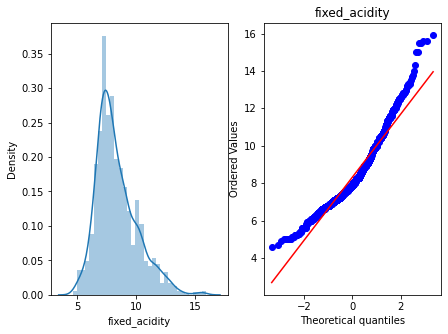

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


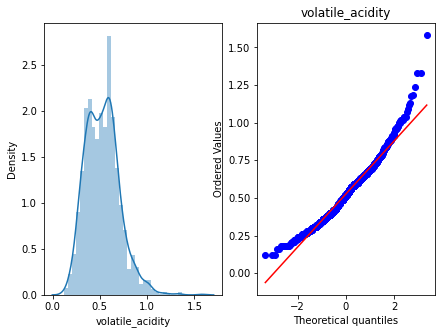

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


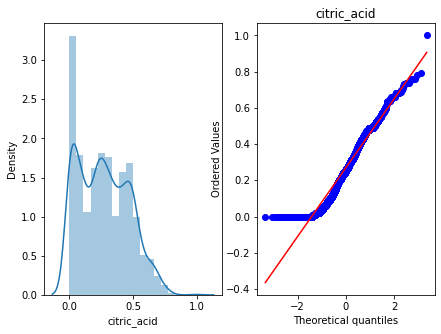

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


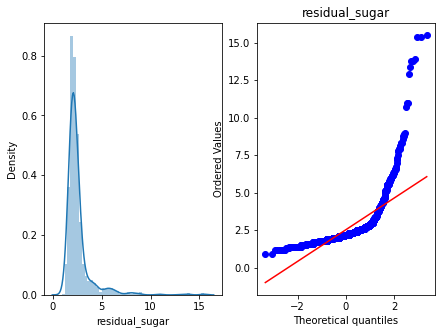

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


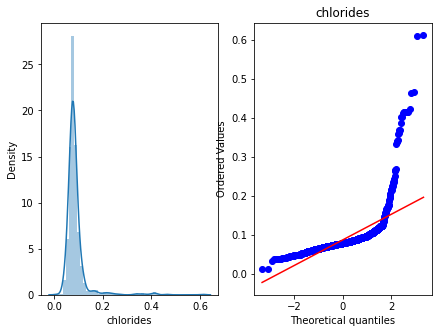

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


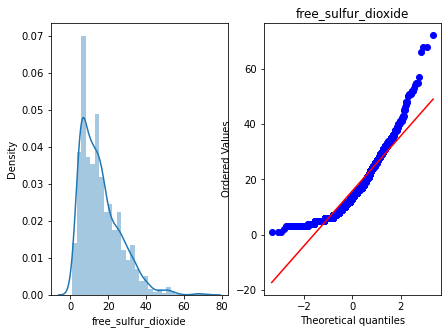

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


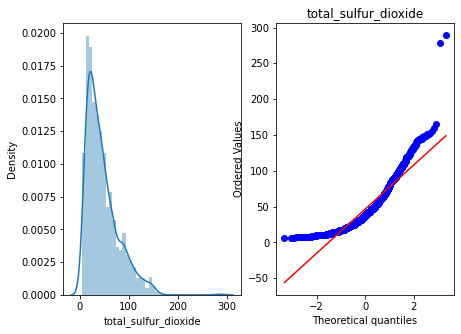

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


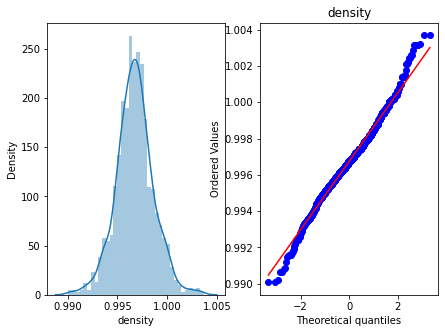

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


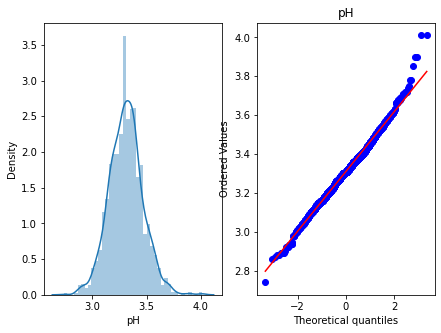

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


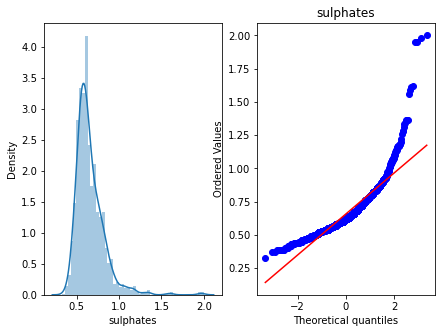

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


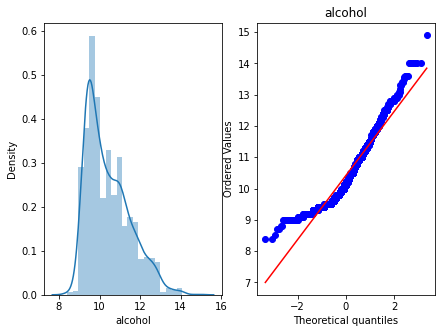

In [9]:
#checking the distribution of the contunious features
for feature in continuous_feature:
    plt.figure(figsize=(7,5))
    plt.subplot(1, 2, 1)
    sns.distplot(data[feature])
    plt.subplot(1, 2, 2)
    probplot(data[feature], dist='norm', fit=True, plot=plt)
    plt.title('{}'.format(feature))
    plt.show()

# observation

1. fixed acidity, volatile acidity, density, ph, citric acid and alcohol are approximately normally distributed
2. residual sugar, chlorides, free sulphur dioxide, total suplhur dioxide, sulphates are 
skewed towards right side (need log normal transformation)

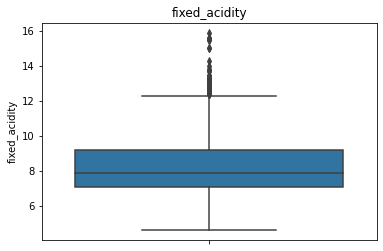

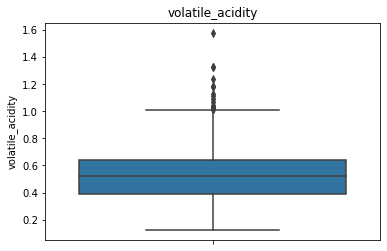

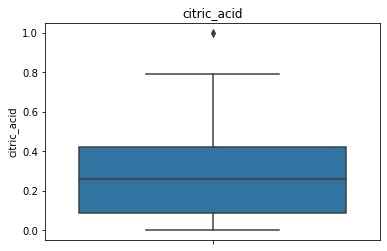

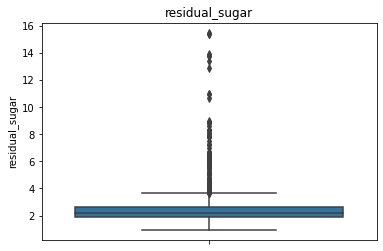

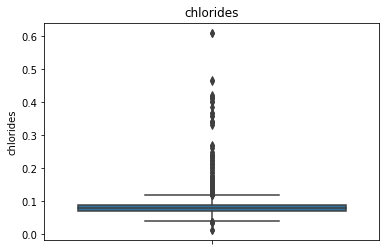

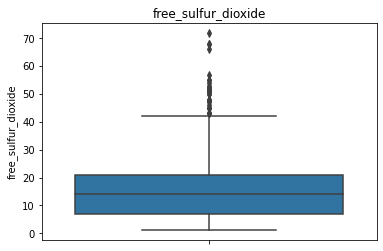

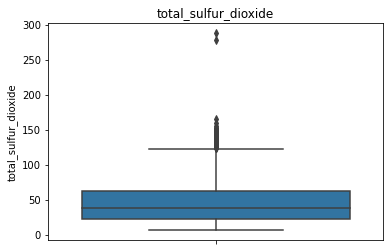

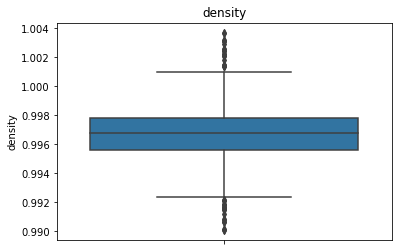

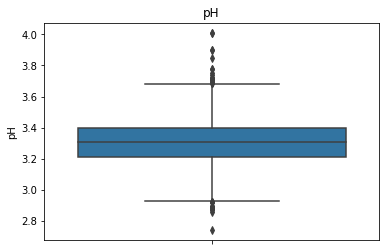

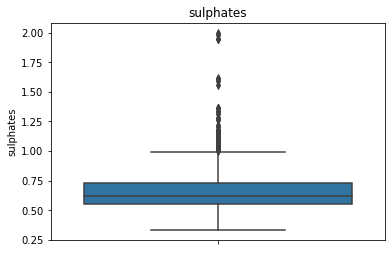

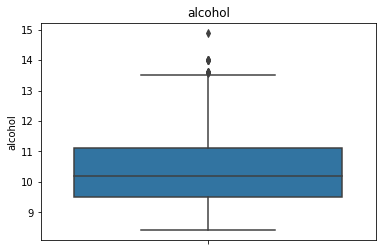

In [10]:
#checking the number of outliers present in the datset by drawing box plot
for feature in continuous_feature:
    sns.boxplot(y=data[feature])
    plt.title('{}'.format(feature))
    plt.show()

# observation

1. fixed acidity, volatile acidity, residual sugar, free sulfur dioxide, total sulphur dioxide
suphates and alcohol have outliers present in the upper boundary of the feature
2. chlorides and ph have outliers present in both the sides

# univariate analysis on target feature

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

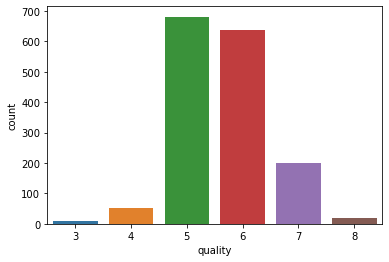

In [11]:
#count plot on target feature to check the imbalance of data
sns.countplot(data.quality)

# observation

The feature is balanced one.

# multivariate analysis on both categorical and continuous features

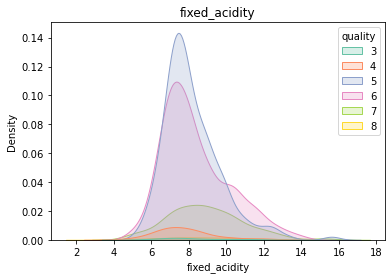

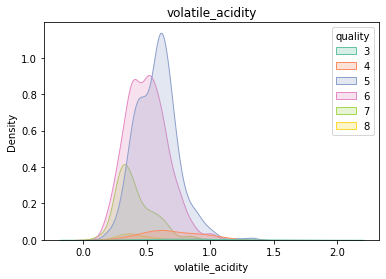

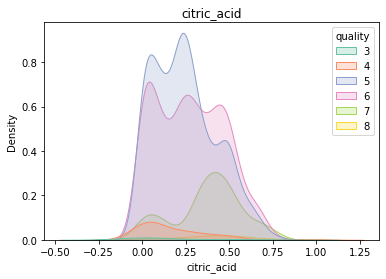

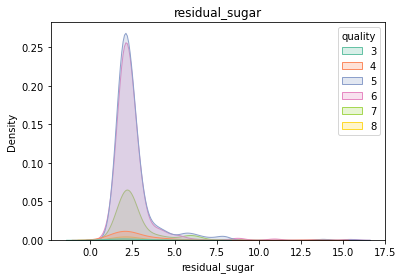

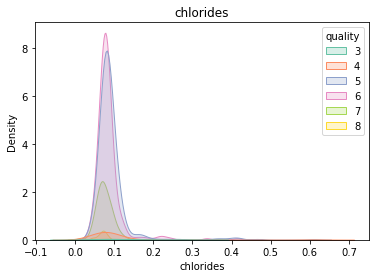

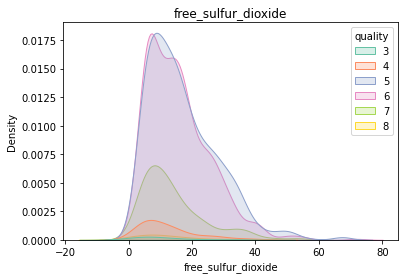

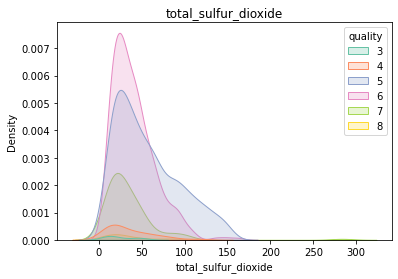

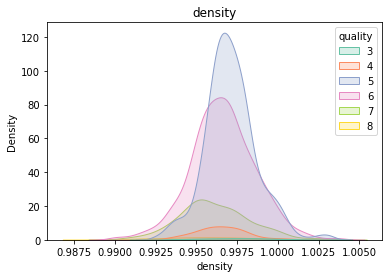

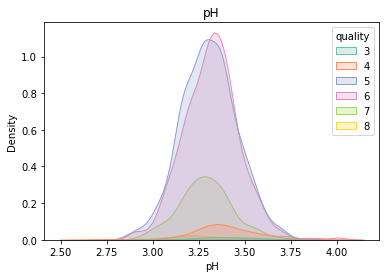

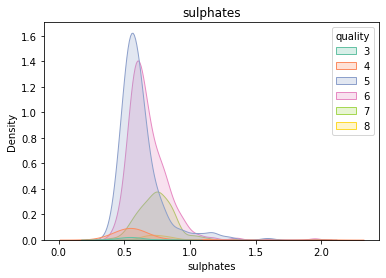

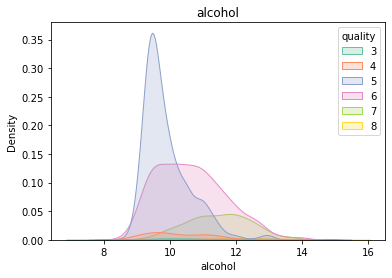

In [12]:
#distribution of continuous variables vs target variables
palette2 = sns.color_palette("Set2", 6)
for feature in continuous_feature:
    sns.kdeplot(data[feature], hue=data.quality, shade=True, palette=palette2)
    plt.title('{}'.format(feature))
    plt.show()

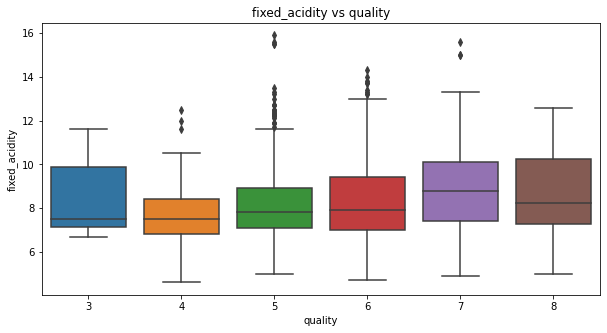

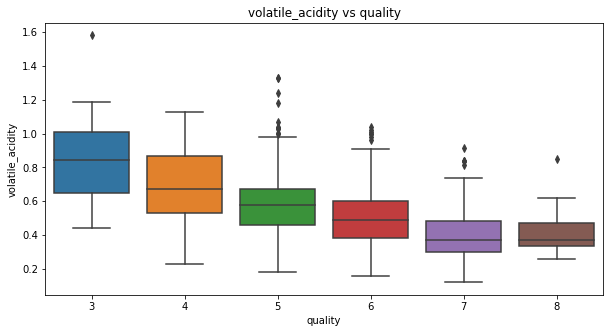

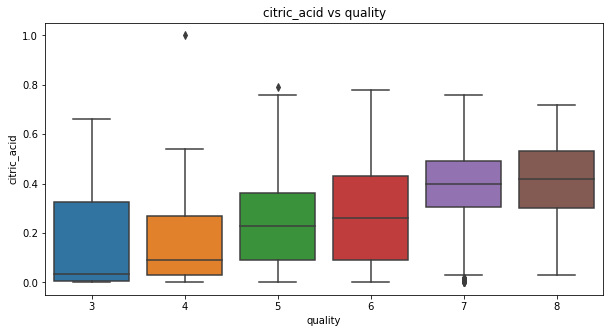

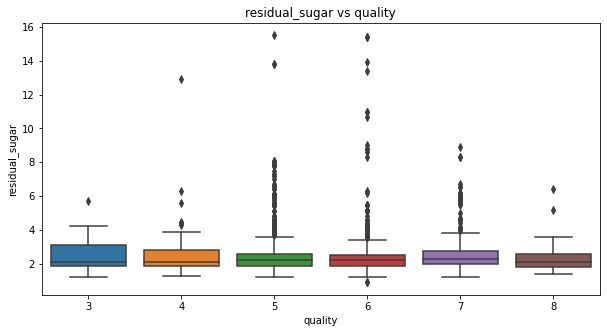

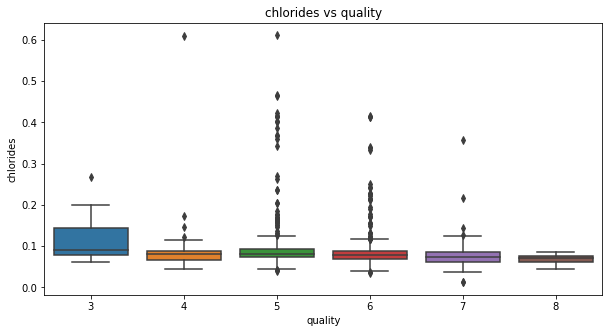

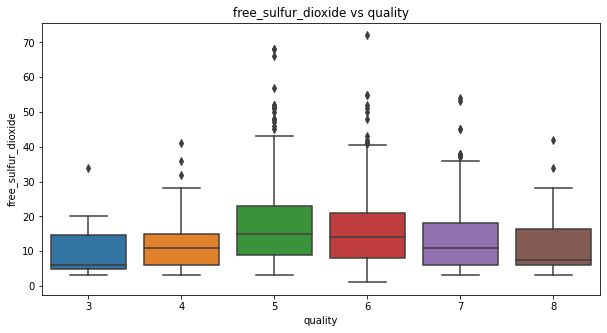

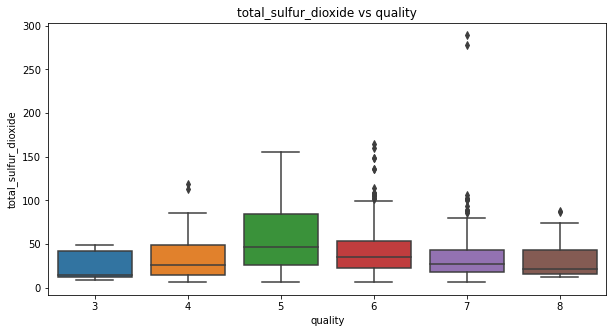

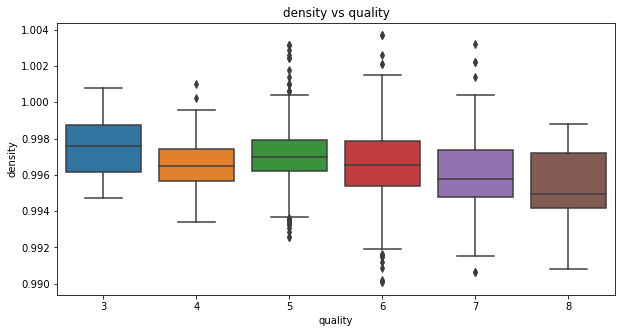

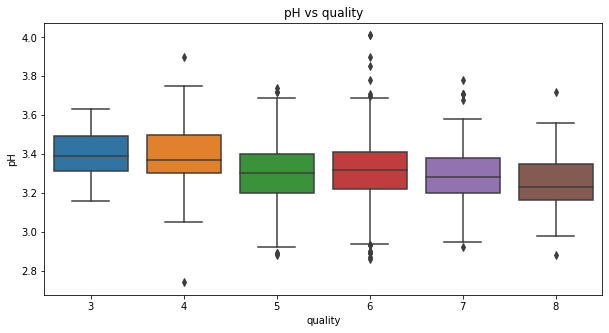

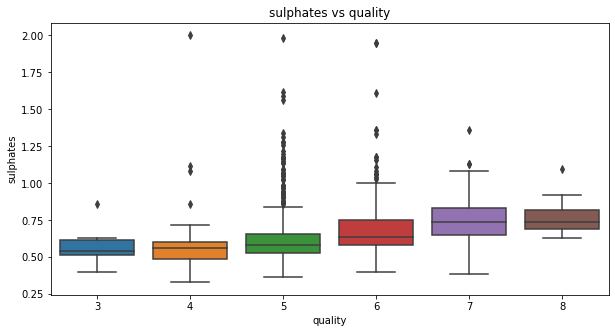

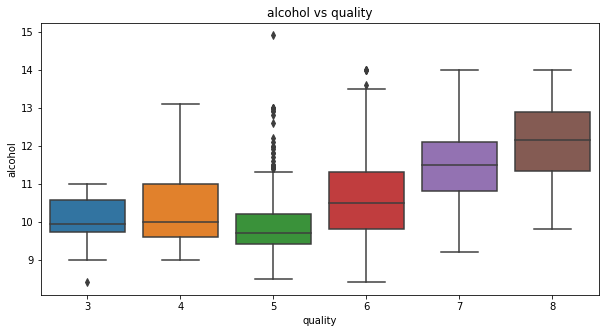

In [13]:
#boxplot of continuous features vs target feature
for feature in continuous_feature:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=data[feature], x=data.quality)
    plt.title('{} vs quality'.format(feature))
    plt.show()

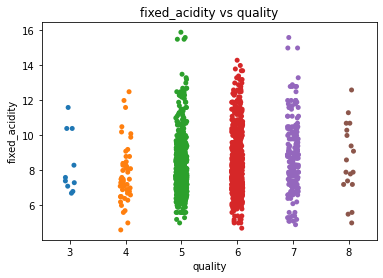

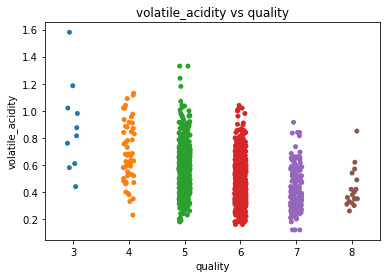

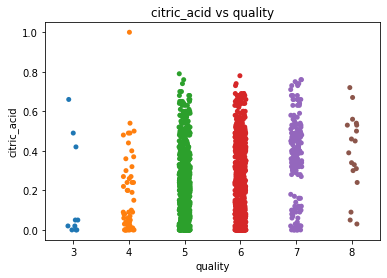

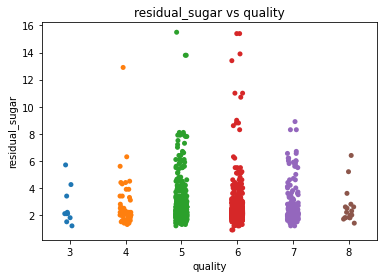

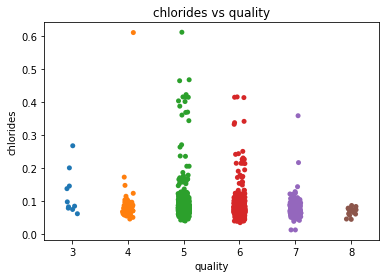

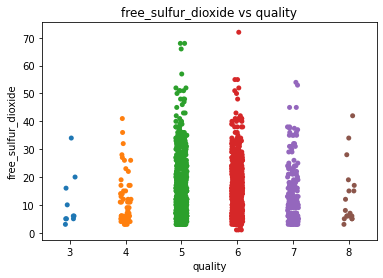

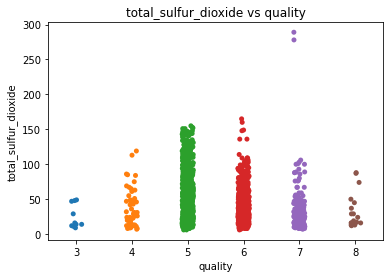

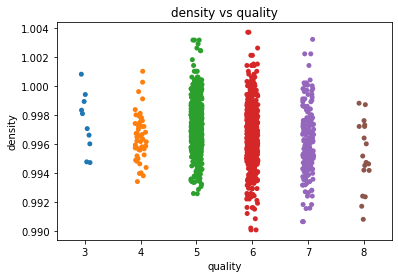

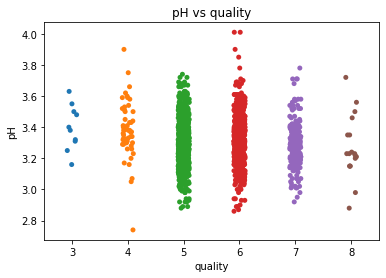

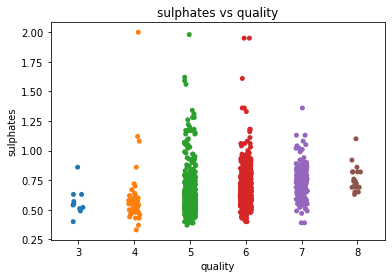

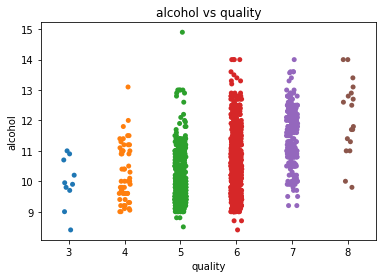

In [14]:
#drawing striplot to compare continuous and target features 
for feature in continuous_feature:
    sns.stripplot(x=data.quality, y=data[feature])
    plt.title('{} vs quality'.format(feature))
    plt.show()

# observation

The wine quality of continuous features are mostly 5,6 and 7.

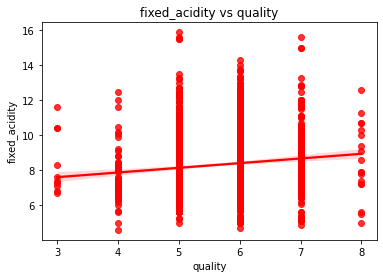

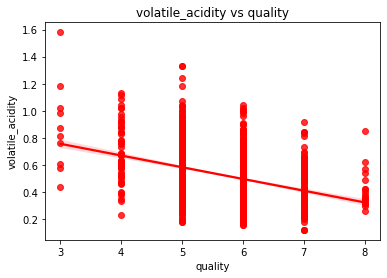

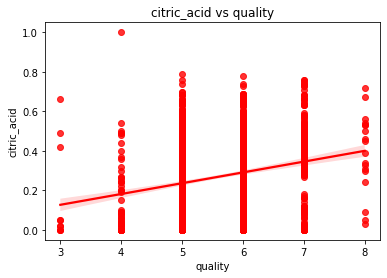

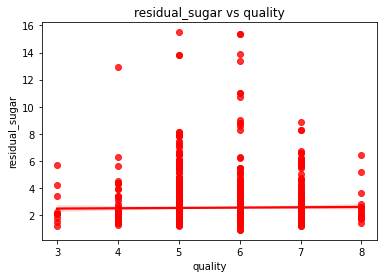

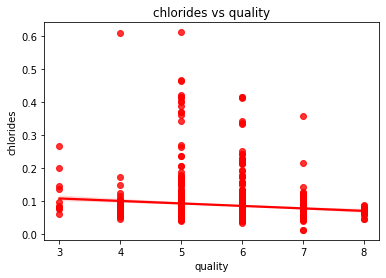

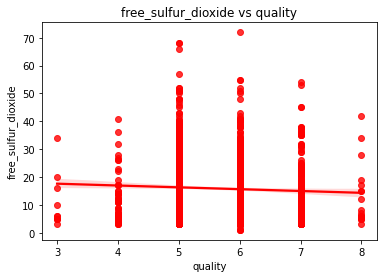

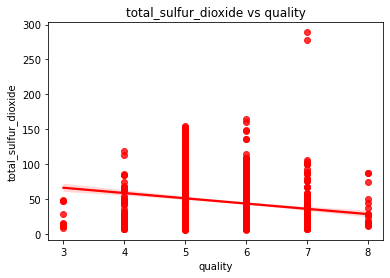

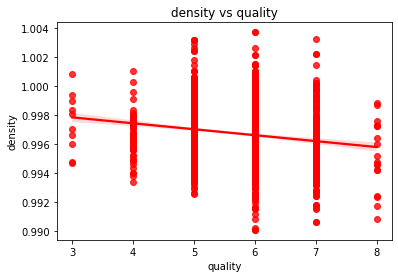

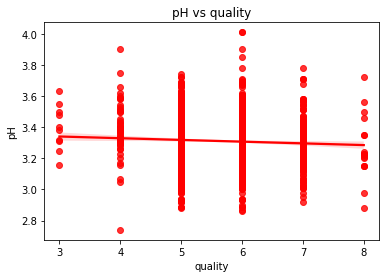

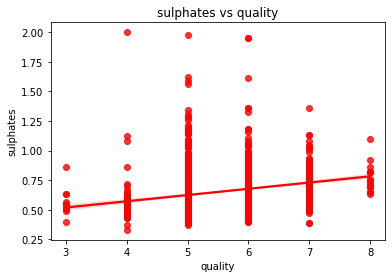

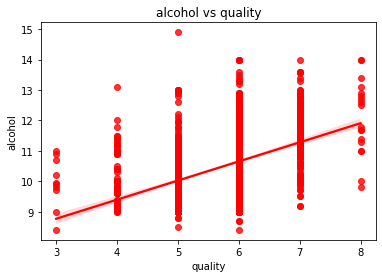

In [15]:
#to see the trend of the continuous features by target feature
for feature in continuous_feature:
    sns.regplot(y=data[feature], x=data.quality,color='red')
    plt.title('{} vs quality'.format(feature))
    plt.show()

# observation

1. fixed acidity level increases with increse in the quality of wine
2. increase in volatile acidity decreases the quality of wine
3. the level of citric acid in the wine increases with increase in quality
4. residual sugar showing no trend
5. total sulfur dioxide decreases with increase in quality
6. ph level showing downward trend
7. if you increase the level of alcohol the quality improves significantly

In [16]:
#finding the corelation between the variables
round(data.corr(),2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


<AxesSubplot:>

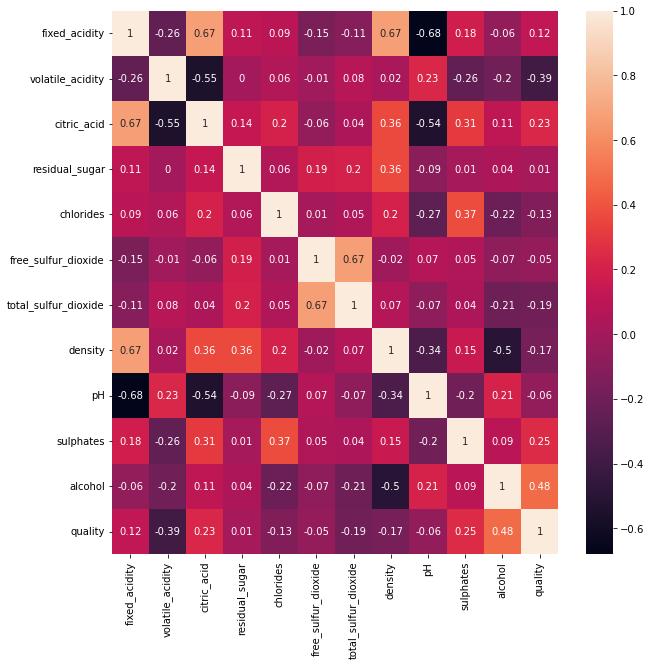

In [17]:
#plotting the corelation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(round(data.corr(),2), annot=True)

# observation

1. fixed acidity and density, fixed acidity and citric acid, total sulphur dioxide and free sulphur dioxide,
fixed acid and density are only showing moderate corelation of 0.67

2. there is no high corelation between the variables

In [18]:
#splitting the data into x and y
#seperating out independent and dependent variables
#creating x to represent all independent variables
x= data.drop('quality', axis=1)

In [19]:
#creating y as dependent variable
y = data.quality 

In [20]:
#importing train and test split
from sklearn.model_selection import train_test_split

In [21]:
#splitting the data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [22]:
#shape of the splits
print('shape of x_train:', x_train.shape, '\nshape of x_test:', x_test.shape, '\nshape of y_train:', y_train.shape, '\nshape of y_test:', y_test.shape)

shape of x_train: (1279, 11) 
shape of x_test: (320, 11) 
shape of y_train: (1279,) 
shape of y_test: (320,)


In [23]:
#importing standard scalar to scale the training dataset
from sklearn.preprocessing import StandardScaler

In [24]:
#creating scalar object
std = StandardScaler()

In [25]:
#transforming the x_train dataset
x_train = std.fit_transform(x_train)

In [26]:
#transforming the x_test dataset
x_test = std.fit_transform(x_test)

In [27]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
x_train = pd.DataFrame(x_train, columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-1.829663,-0.215004,-0.078789,-0.162577,0.040156,0.684631,0.840745,-0.791361,2.620026,-0.221282,1.692550
1,-0.204284,1.574821,-0.130204,0.647947,-0.247920,1.723801,1.172968,-0.049945,-0.765428,-1.363642,-1.135533
2,-1.191122,2.749394,-1.415557,-0.383629,-0.103882,0.117811,-0.669356,-1.291012,1.838767,-0.621108,0.749856
3,-0.378432,0.400249,-1.415557,0.058475,-0.680035,-0.826890,-1.001579,-0.205750,0.471565,-0.563990,0.372778
4,-0.146235,0.092622,-0.490102,-0.457313,-0.165613,-0.260070,-0.337134,0.229429,-0.049274,-0.392636,-1.324071
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.027913,0.512113,-0.798587,-0.530997,-0.330228,2.101681,-0.004912,-0.931049,0.471565,1.320904,1.315472
1275,0.376208,1.434991,-0.181618,-0.604682,-0.206766,-0.543480,-0.759963,0.078997,-0.114379,0.064308,-0.381377
1276,-0.320383,-0.047208,-0.130204,-0.457313,-0.145036,-0.165600,-0.246528,0.874139,0.797089,-0.049928,-1.324071
1277,0.898651,-1.445509,1.103735,1.826892,-0.124459,-0.637950,-0.880771,-1.038500,-0.765428,-0.792462,1.975358


In [29]:
x_test = pd.DataFrame(x_test, columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1.002711,-0.641368,1.008590,2.243377,-0.351832,-1.045472,-1.054727,0.190935,-0.736807,-1.144936,1.206641
1,-0.604397,1.749642,-1.199556,1.118123,0.270192,-1.146362,-1.086037,0.180842,0.541470,-0.592432,0.466021
2,-0.715232,0.192706,-1.148204,-0.694785,0.021382,1.981226,-0.052834,-0.717378,1.308436,-0.592432,0.095712
3,0.503953,1.388211,-0.172511,-0.257187,-0.152785,-0.440132,0.009784,0.483613,-0.928548,-1.006810,-0.830063
4,-0.992320,-0.307738,0.751829,-0.132159,-0.351832,-0.843692,-0.898182,-0.172390,1.500178,0.512578,0.095712
...,...,...,...,...,...,...,...,...,...,...,...
315,-0.770650,-0.641368,0.289659,3.868743,-0.028380,0.972327,-0.084143,0.806569,0.349729,-0.108990,-0.367176
316,-0.936902,-0.752577,-0.121159,3.556172,-0.849452,1.174107,1.356078,-0.727470,0.733212,-0.730558,1.484374
317,-0.604397,0.025891,-0.942795,-0.569757,-0.351832,-0.137463,-0.741636,-0.777932,-0.225496,0.029136,0.280867
318,-0.604397,0.859964,-1.302260,-0.194673,0.046263,0.064317,-0.679018,0.599675,0.797126,-0.868684,-0.922641


In [30]:
#importing SVC model using sklearn
from sklearn.svm import SVC

In [31]:
#creating svc object
svc = SVC()

In [32]:
#fitting the model by passing training datset
svc.fit(x_train, y_train)

SVC()

In [33]:
#intercept of the variables
svc.intercept_

array([-0.77326506, -0.98441636, -0.91749343, -0.69099756, -0.18110642,
       -0.8675547 , -0.80089786, -0.22664171,  0.45354445,  0.26975093,
        0.50877003,  0.89849044,  0.73790804,  0.9877035 ,  0.93512134])

In [34]:
#model prediction
y_pred = svc.predict(x_test)
y_pred

array([7, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 7, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5,
       5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5,
       6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 6,
       5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 7,
       5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 5, 7, 5, 5, 6, 6, 6, 5, 6, 6,
       5, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 7,
       6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 6, 7, 6, 5,

# Performance Metrics

In [35]:
#importing all the performance metrics from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [36]:
#accuarcy score of the model
accuracy_before = round(accuracy_score(y_test, y_pred), 2)
accuracy_before

0.63

In [37]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0, 10,  3,  1,  0],
       [ 0,  0, 98, 35,  1,  0],
       [ 0,  0, 31, 89,  8,  0],
       [ 0,  0,  0, 23, 16,  0],
       [ 0,  0,  0,  1,  2,  0]], dtype=int64)

In [38]:
#classification report of the model
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.70      0.73      0.71       134
           6       0.59      0.70      0.64       128
           7       0.57      0.41      0.48        39
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.31      0.31      0.30       320
weighted avg       0.60      0.63      0.61       320



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression model

In [39]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [40]:
logi = LogisticRegression()

In [41]:
#fitting the model on training data
logi.fit(x_train, y_train)

LogisticRegression()

In [42]:
#coefficient of the model
print (logi.coef_)

[[ 0.23478128  0.93228753 -0.30207387  0.0074526   0.80756489  0.44599789
  -0.96994638  0.54627353  0.61274151 -0.51361268 -0.85649977]
 [ 0.53236939  0.43133736 -0.16049789  0.29644118  0.26386329 -0.42290007
   0.29641712 -0.56367592  0.44842982 -0.15909471 -0.62994279]
 [-0.44300702 -0.04465102 -0.07926934 -0.18851802  0.17310743 -0.10572681
   0.7356322   0.39621667 -0.17836289 -0.42159045 -0.56249334]
 [-0.16444558 -0.45491894 -0.29124487 -0.11292292  0.02494286  0.0909286
   0.24571239  0.23223674 -0.12725761 -0.0123946   0.24122384]
 [ 0.38498643 -0.76783705 -0.00631964  0.20526206 -0.26106126  0.13894167
  -0.02259606 -0.3071142   0.03426456  0.45688186  0.71816288]
 [-0.5446845  -0.09621787  0.83940561 -0.2077149  -1.00841722 -0.14724129
  -0.28521927 -0.30393682 -0.7898154   0.64981058  1.08954918]]


In [43]:
#intercept of the model
logi.intercept_

array([-3.31933367, -0.19085877,  2.65660398,  2.81459017,  0.69471618,
       -2.65571788])

In [44]:
#predicting the model by passing x_test
logi_pred = logi.predict(x_test)
logi_pred

array([6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 7, 5, 6, 6, 5,
       5, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 7, 5,
       5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5,
       5, 5, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 6,
       5, 7, 6, 7, 3, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 7,
       5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 6, 6, 7, 6, 5, 7, 6,
       5, 7, 7, 5, 5, 5, 6, 6, 7, 6, 7, 6, 7, 5, 7, 5, 5, 5, 5, 6, 6, 7,
       6, 7, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 5, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 5,

# Performance metrics of the model

In [45]:
#calculating accuracy score
round (accuracy_score(y_test, logi_pred), 2)

0.58

In [46]:
#confusion matrix
confusion_matrix(y_test, logi_pred)

array([[  1,   0,   1,   0,   0,   0],
       [  0,   0,   9,   4,   1,   0],
       [  0,   0, 100,  32,   2,   0],
       [  0,   0,  40,  73,  15,   0],
       [  0,   0,   1,  26,  12,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [47]:
#classification report
print (classification_report(y_test, logi_pred))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00        14
           5       0.66      0.75      0.70       134
           6       0.54      0.57      0.55       128
           7       0.38      0.31      0.34        39
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.43      0.35      0.38       320
weighted avg       0.54      0.58      0.56       320



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# improving the model accuracy by applying hyper parameter tuning

In [48]:
#hyper tuning the parameter kernel by applying different model
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    print(kernel, round(model.score(x_train, y_train), 2))    

linear 0.58
poly 0.68
rbf 0.67
sigmoid 0.48


In [49]:
#hypertuning the gamma parameter
for scale in ['scale', 'auto']:
    model = SVC(gamma=scale)
    model.fit(x_train, y_train)
    print(scale, round (model.score(x_train, y_train)))

scale 1
auto 1


In [50]:
#hyper tuning on degree parameter
for degree in range(15):
    model = SVC(degree=degree, kernel='poly', C=100)
    model.fit(x_train, y_train)
    print(degree, round(model.score(x_train, y_train)))

0 0
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1


In [51]:
#importing gridsearch cv
from sklearn.model_selection import GridSearchCV

In [52]:
#parameters for performing hyperparameter tuning
parameter = ({'kernel':['poly', 'linear', 'rbf', 'sigmoid'], 'C': [i for i in range(1,100,10)], 'degree': range(10)})

In [53]:
parameter

{'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
 'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
 'degree': range(0, 10)}

In [54]:
#creating object for gridsearch cv
grid = GridSearchCV(svc, param_grid=parameter)

In [55]:
#fitting the model
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': range(0, 10),
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']})

In [56]:
#best parameters after hyper parameter tuning
grid.best_params_

{'C': 31, 'degree': 0, 'kernel': 'rbf'}

In [57]:
#accuracy score after performing hyper parameter tuning
accuracy_after = round(grid.best_score_, 2)
accuracy_after

0.64

In [58]:
print ('accuracy score without performing hypermeter tuning:', accuracy_before, 
      '\naccuracy score after performing hypermeter tuning:', accuracy_after)

accuracy score without performing hypermeter tuning: 0.63 
accuracy score after performing hypermeter tuning: 0.64


# obsevation

the accuracy score has been improved by 1 percentage.